# PROBLEM STATEMENT

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.


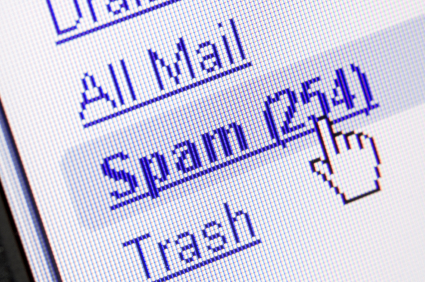

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [2]:
spam_df = pd.read_csv("dataset/emails.csv")

In [3]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [6]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# STEP #2: VISUALIZE DATASET

In [8]:
ham = spam_df[spam_df['spam']==0]

In [9]:
spam = spam_df[spam_df['spam']==1]

In [10]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [11]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [12]:
print( 'Spam percentage =', (len(spam) / len(spam_df) )*100,"%")

Spam percentage = 23.88268156424581 %


In [13]:
print( 'Ham percentage =', (len(ham) / len(spam_df) )*100,"%")

Ham percentage = 76.11731843575419 %


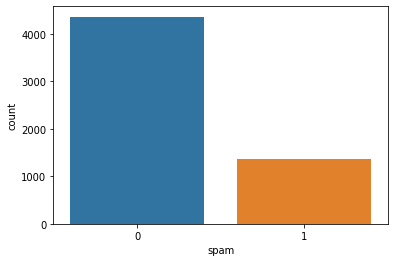

In [14]:
sns.countplot(spam_df['spam'], label = "Count") 

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# COUNT VECTORIZER EXAMPLE 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.',
               'This document is the second document.',
               'And this is the third one.',
               'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

# Stop Words

# Create a sorted list of unique words - ordered
# Assign Counts to each of these words
# Then encode each sentence into an array/list with counts and order of each word

In [23]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [24]:
print(X.toarray())  

# 'This is the first document.'

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# LET'S APPLY COUNT VECTORIZER TO OUR SPAM/HAM EXAMPLE

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])


In [19]:
print(vectorizer.get_feature_names())


['00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '0005', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '0009249506', '001', '0011', 

In [20]:
print(spamham_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
spamham_countvectorizer.shape

# 1,37303

# email.csv contains 37303 unique words

#[1,0,0,2,3,4,5,0,0,0,0,0,0,0] - Sparse Representation

(5728, 37303)

# STEP#4: TRAINING THE MODEL WITH ALL DATASET

In [25]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = spam_df['spam'].values
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
testing_sample = ["Free money!!!", "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)


In [33]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

ValueError: dimension mismatch

In [34]:
# Mini Challenge!
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']


In [31]:
testing_sample = ['money viagara!!!!!', "Hello, I am Ryan, I would like to book a hotel in SF by January 24th"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

ValueError: dimension mismatch

# STEP#4: DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [35]:
X = spamham_countvectorizer
y = label

In [36]:
X.shape

(5728, 37303)

In [37]:
y.shape

(5728,)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
# from sklearn.naive_bayes import GaussianNB 
# NB_classifier = GaussianNB()
# NB_classifier.fit(X_train, y_train)

# STEP#5: EVALUATING THE MODEL 

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

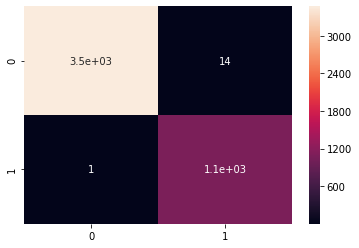

In [45]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

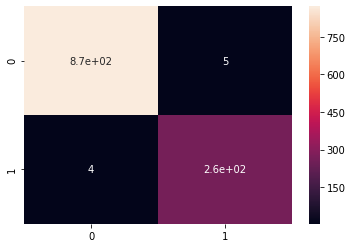

In [46]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [44]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       877
           1       0.98      0.99      0.98       269

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



# EXCELLENT JOB! NOW YOU BECAME FAMILIAR WITH NAIVE BAYES, GREAT JOB!